# 분류 - 로지스틱 회귀
- 이진분류 / 다중분류
- 선형 회귀와 다른 점: **시그모이드 함수** 사용 -> 확률에 따른 분류
- 시그모이드 함수와 오즈비(odds)의 관계: 오즈비에 로그함수 적용
- odds(p)= p/(1-p) p
- log(odds(p)) 0,1 밖에 안되는 확률의 범위를 -> 실수전체로 확장
- x 값이 커지면 1로 근사, 작아지면 0에 근사, 0일 경우 0.5

## 시그모이드 함수

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

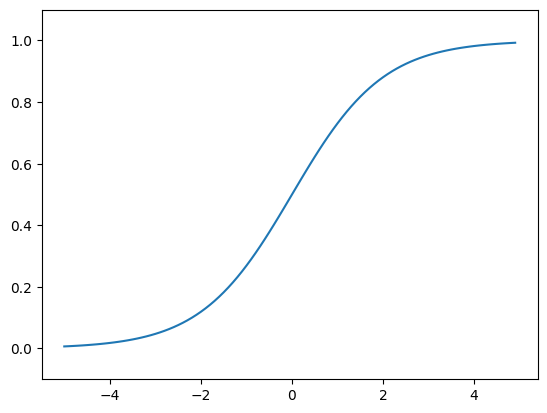

In [ ]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

##데이터 불러오기
- 유방암 데이터

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# sc
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=111)

##성능 확인
- accuracy, roc 커브

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#정확도, Roc 측정
print(accuracy_score(y_test,lr_preds), '정확도')
print(roc_auc_score(y_test,lr_preds), 'roc')

0.9766081871345029 정확도
0.9730868075385495 roc


##파라미터 조정

In [ ]:
solvers= ['lbfgs','liblinear','newton-cg','sag','saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver = solver, max_iter = 800)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)

    print('solver:{0}, accuracy:{1:.3f}, roc_auc:{2:.3f}'.format(solver, accuracy_score(y_test, lr_preds),
                                                                roc_auc_score(y_test, lr_preds)))

solver:lbfgs, accuracy:0.977, roc_auc:0.973
solver:liblinear, accuracy:0.977, roc_auc:0.973
solver:newton-cg, accuracy:0.977, roc_auc:0.973
solver:sag, accuracy:0.977, roc_auc:0.973
solver:saga, accuracy:0.977, roc_auc:0.973


## 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV


def log_tuning(train, y, params):
    lr_clf = LogisticRegression(random_state=111)
    grid = GridSearchCV(lr_clf, params, scoring='roc_auc',cv =7)
    grid.fit(train,y)

    print(grid.best_params_)
    print(grid.best_score_)

    return grid.best_estimator_

In [ ]:
#파라미터 하나씩 정의해 보기
param1 = {'penalty':['l2','l1'], 'C':[0.01, 0.1, 1, 5, 10 ,100], 'max_iter':[100,500]}
log_tuning(X_train, y_train, params= param1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
0.9958251618965904


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
84 fits failed out of a total of 168.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

LogisticRegression(C=0.1, random_state=111)

In [ ]:
#파라미터 하나씩 정의해 보기
param2 = {'penalty':['l2'], 'C':[0.1,0.2,0.3,0.5, 1, 5, 10], 'max_iter':[100,200,300,400,500,700]}
log_tuning(X_train, y_train, params= param2)

{'C': 0.5, 'max_iter': 100, 'penalty': 'l2'}
0.9967781557067271


LogisticRegression(C=0.5, random_state=111)

- 'C': 0.5, 'max_iter': 100, 'penalty': 'l2' 일 때 가장 성능이 좋다

In [ ]:
model = log_tuning(X_train, y_train, params  =param2)
y_pred = model.predict_proba(X_test)

y_pred

{'C': 0.5, 'max_iter': 100, 'penalty': 'l2'}
0.9967781557067271


array([[7.10381018e-04, 9.99289619e-01],
       [3.43808838e-04, 9.99656191e-01],
       [4.82892191e-03, 9.95171078e-01],
       [1.92332808e-01, 8.07667192e-01],
       [4.90231121e-04, 9.99509769e-01],
       [9.99976816e-01, 2.31840973e-05],
       [2.07757937e-01, 7.92242063e-01],
       [7.50657439e-01, 2.49342561e-01],
       [2.39797234e-02, 9.76020277e-01],
       [9.98376889e-01, 1.62311100e-03],
       [9.88289488e-01, 1.17105116e-02],
       [4.44696113e-01, 5.55303887e-01],
       [1.11252860e-03, 9.98887471e-01],
       [3.60219184e-04, 9.99639781e-01],
       [1.52044569e-03, 9.98479554e-01],
       [9.99958996e-01, 4.10042882e-05],
       [6.22466979e-03, 9.93775330e-01],
       [9.86332422e-01, 1.36675776e-02],
       [5.21628097e-04, 9.99478372e-01],
       [2.79693354e-04, 9.99720307e-01],
       [3.64867902e-02, 9.63513210e-01],
       [9.99999717e-01, 2.83153562e-07],
       [2.18979327e-02, 9.78102067e-01],
       [1.41305330e-03, 9.98586947e-01],
       [1.254306